In [99]:
import numpy as np
import random

def step(rels, pb, pr, pn):
    baby_index = random.randrange(0,N)
    parent_index = random.choice(range(0, baby_index) + range(baby_index+1, N)) # excludes dead index
    
    #killing the guy. he is not a friend of anybody now
    rels[:,baby_index] = np.zeros(N) 
    rels[baby_index] = np.zeros(N) 
    
    parent_friends_indexes = np.where(rels[parent_index]==1)[0].tolist()          
    for i in parent_friends_indexes:
        if random.random()<pn: 
            rels[baby_index,i] = 1
            rels[i,baby_index] = 1
        continue
        
    for i in set(range(0,N)) - set(parent_friends_indexes):
        if i == baby_index:
            continue # it's me .. i am not friend of myself...am i?

        if i == parent_index:
            if random.random()<pb: 
                rels[baby_index,i] = 1
                rels[i,baby_index] = 1
            continue

        #else
        if random.random()<pr:
            rels[baby_index,i] = 1
            rels[i,baby_index] = 1

In [100]:
%%time
def run(pb, pr, pn):
    # init population
    rels = np.zeros((N,N))

    #run steps
    for _ in xrange(steps):
        step(rels,pb, pr, pn)

    return sum([sum(row) for row in rels])/N #degree

N = 100
steps = 2000
pb = 1

pr = 0.5
pr05 = [run(pb, pr, pn) for pn in np.arange(0,1.05,0.05)]
print pr05

pr = 0.3
pr03 = [run(pb, pr, pn) for pn in np.arange(0,1.05,0.05)]
print pr03

pr = 0.1
pr01 = [run(pb, pr, pn) for pn in np.arange(0,1.05,0.05)]
print pr01

[32.94, 34.84, 35.54, 36.96, 38.98, 38.82, 42.04, 42.64, 45.24, 47.32, 48.92, 53.06, 56.36, 57.26, 62.72, 65.94, 71.98, 77.22, 82.88, 90.36, 99.0]
[23.88, 25.32, 25.18, 26.94, 28.24, 28.24, 30.2, 32.16, 33.14, 36.06, 38.96, 40.48, 41.36, 45.94, 49.6, 55.24, 61.46, 65.86, 76.1, 83.98, 99.0]
[9.7, 10.28, 11.3, 11.36, 12.48, 11.8, 13.74, 13.78, 16.58, 15.6, 17.12, 20.6, 21.34, 23.7, 26.88, 31.26, 35.8, 44.18, 55.64, 65.12, 97.22]
CPU times: user 8.06 s, sys: 120 ms, total: 8.18 s
Wall time: 9.13 s


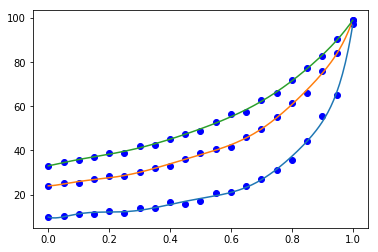

In [101]:
%matplotlib inline
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

def drawFor(x,y):
    for x1, y1 in zip(x, y):
        plt.plot(x1, y1, 'bo')
    x_new = np.linspace(x[0], x[-1], num=len(x)*10)
    coefs = poly.polyfit(x, y, 8)
    ffit = poly.polyval(x_new, coefs)
    plt.plot(x_new, ffit)

drawFor(np.arange(0,1.05,0.05),pr01)
drawFor(np.arange(0,1.05,0.05),pr03)
drawFor(np.arange(0,1.05,0.05),pr05)
plt.show()

In [107]:
%timeit rels[1]=1

The slowest run took 20.41 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 537 ns per loop


In [111]:
g = rels[2]>2

In [112]:
rels

array([[3., 1., 3., 1., 1.],
       [1., 1., 1., 1., 1.],
       [3., 6., 0., 6., 6.],
       [1., 8., 6., 0., 0.],
       [1., 8., 6., 0., 0.]])

In [114]:
rels[1]

array([1., 1., 1., 1., 1.])

In [115]:
g

array([ True,  True, False,  True,  True])

In [116]:
rels[1,g]=9

In [117]:
rels

array([[3., 1., 3., 1., 1.],
       [9., 9., 1., 9., 9.],
       [3., 6., 0., 6., 6.],
       [1., 8., 6., 0., 0.],
       [1., 8., 6., 0., 0.]])

In [127]:
r = np.random.random(size=5)

In [128]:
r

array([0.34197696, 0.57330691, 0.82695491, 0.93752862, 0.83134806])

In [129]:
g

array([ True,  True, False,  True,  True])

In [132]:
g[r<0.6]

array([ True,  True])

In [136]:
rels[1,g]=np.random.random(size=4)<0.2

In [140]:
rels[1,g]=np.random.random(size=4)<0.2
rels

array([[3., 1., 3., 1., 1.],
       [0., 0., 1., 0., 0.],
       [3., 6., 0., 6., 6.],
       [1., 8., 6., 0., 0.],
       [1., 8., 6., 0., 0.]])

In [141]:
k = np.random.random(size=4)

In [142]:
k

array([0.74613112, 0.93127124, 0.06433074, 0.14491059])

In [145]:
rels[1,g]
rels

array([[3., 1., 3., 1., 1.],
       [1., 1., 1., 0., 0.],
       [3., 6., 0., 6., 6.],
       [1., 8., 6., 0., 0.],
       [1., 8., 6., 0., 0.]])

In [147]:
len(rels[1,g])

4

In [151]:
g.ones()

AttributeError: 'numpy.ndarray' object has no attribute 'ones'

In [169]:
k = np.random.random(size=10000)

In [170]:
k[k>0.5]=1

In [172]:
k[k<0.5]=0

In [178]:
%timeit len(k[k==1])
%timeit k.sum()

10000 loops, best of 3: 64.6 µs per loop
The slowest run took 4.82 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 6.63 µs per loop


In [176]:
len(k[k==1])

5009

In [174]:
k.sum()

5009.0

In [175]:
k

array([0., 1., 0., ..., 1., 0., 1.])

In [168]:
k

array([ True,  True,  True, ...,  True,  True,  True])

In [181]:
random.randrange(0,7)

3